# The Sparks Foundation

## Piyush Kumar

## (Data Science & Business Analytics Intern)

### GRIP Task #6 - Prediction using Decision Tree Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\piyus\OneDrive\Desktop\Sparks Foundation\Task-6\Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [7]:
df.shape

(150, 6)

In [8]:
df.drop('Id',axis=1,inplace=True)

In [9]:
duplicate_rows = df[df.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  3


In [10]:
df.drop_duplicates(inplace=True)
print("No. of rows after dropping duplicates: ", df.shape[0])

No. of rows after dropping duplicates:  147


In [11]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feature)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


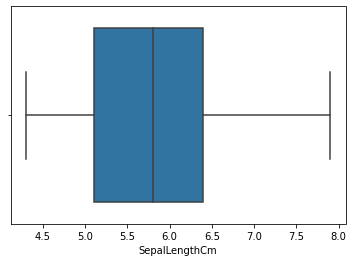

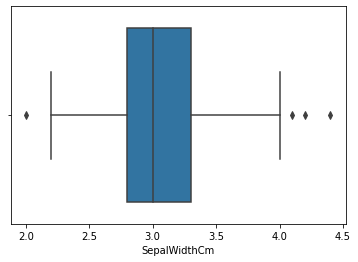

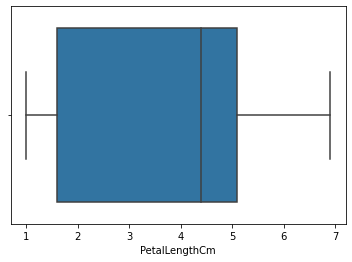

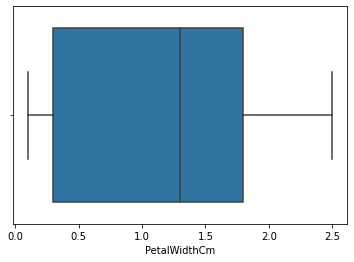

In [12]:
for feature in num_feature:
    sns.boxplot(df[feature])
    plt.show()

In [13]:
Q1 = df[num_feature].quantile(0.25)
Q3 = df[num_feature].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64


In [14]:
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print("No. of rows remaining: ", df.shape[0])

No. of rows remaining:  143


In [15]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [16]:
df["Species"]=encode.fit_transform(df['Species'])

In [17]:
y=df.iloc[:,[-1]]

In [18]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [39]:
x=df.iloc[:,:-1]

In [40]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
treemodel=DecisionTreeClassifier()

In [45]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
y_pred=treemodel.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score,classification_report

In [48]:
score=accuracy_score(y_pred,y_test)

In [49]:
print(score)

0.9534883720930233


In [50]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94        16

    accuracy                           0.95        43
   macro avg       0.96      0.95      0.95        43
weighted avg       0.96      0.95      0.95        43



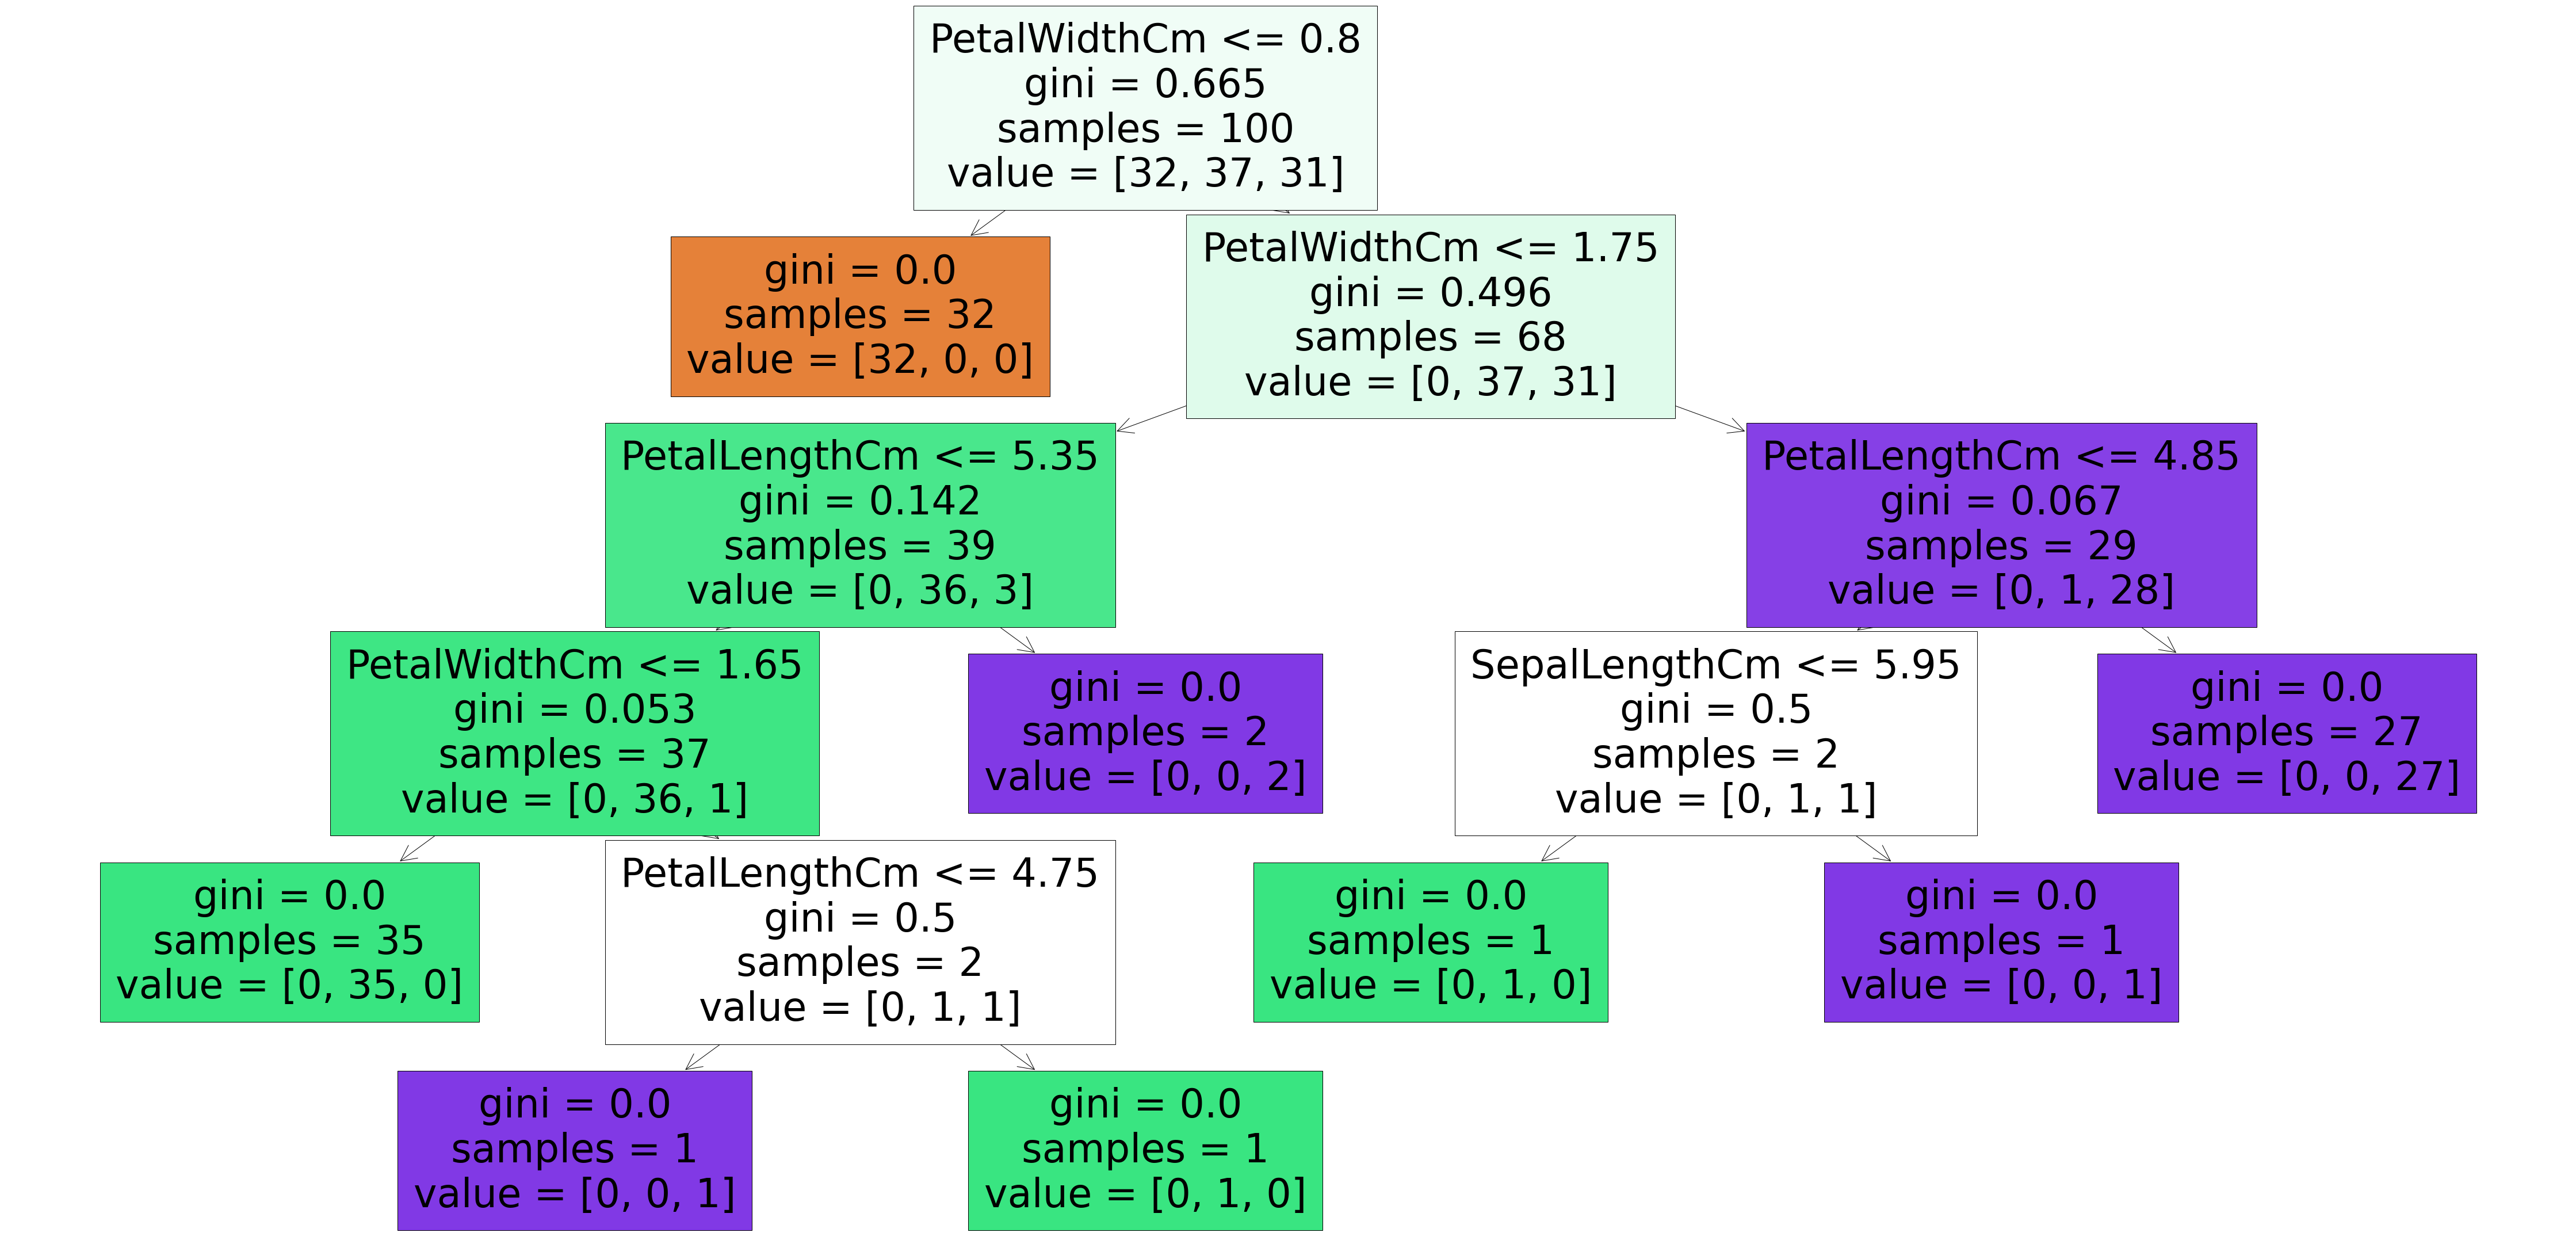

In [56]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(treemodel, feature_names = x.columns,filled=True);